# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.406687e+01     1.438044e+01
 * time: 0.004358053207397461
     1     6.337427e+01     1.241994e+01
 * time: 0.012862920761108398
     2     5.561439e+01     1.614763e+01
 * time: 0.03317713737487793
     3     4.146410e+01     1.094831e+01
 * time: 0.06243705749511719
     4     3.253742e+01     9.348464e+00
 * time: 0.09151005744934082
     5     1.352673e+01     2.965121e+00
 * time: 0.212446928024292
     6     9.942308e+00     2.257629e+00
 * time: 0.23355698585510254
     7     9.097806e+00     1.629285e+00
 * time: 0.25558900833129883
     8     8.636790e+00     3.125836e+00
 * time: 0.27314114570617676
     9     8.434748e+00     3.199171e+00
 * time: 0.29143714904785156
    10     8.030597e+00     2.334915e+00
 * time: 0.3089261054992676
    11     7.536623e+00     1.695187e+00
 * time: 0.3266310691833496
    12     7.075572e+00     1.442831e+00
 * time: 0.3436751365661621
    13     6.657480e+00     1.540073e+00
 * time: 0.

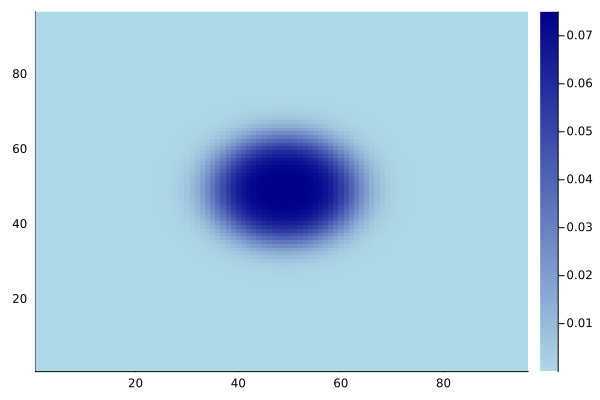

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)